# Lab 5 - Data Visualization

In [269]:
import pandas as pd
import matplotlib.pyplot as plt


## NFL Offense Data

1. Import the NFL week 3, 4, and 5 data and add a week column to dataset and set the value to 3, 4, or 5 for all rows from that week. Combine the weekly dataframes by adding the dataframes together row-wise. Also merge the nfl_teams.csv data to this dataframe so that the division and conference info is included.

In [270]:
week3 = pd.read_csv("nfloffenseweek3.csv")
week4 = pd.read_csv("nfloffenseweek4.csv")
week5 = pd.read_csv("nfloffenseweek5.csv")
teams = pd.read_csv("nfl_teams.csv")
colors_logos = pd.read_csv("teams_colors_logos.csv")


In [271]:
week3_column = week3.assign(week=3)
week4_column = week4.assign(week=4)
week5_column = week5.assign(week=5)
all_weeks = [week3_column, week4_column, week5_column]
stacked_files = pd.concat(all_weeks)
stacked_files.rename(columns={'1st_downs':'first_downs'},inplace=True)
stacked_files.merge(teams,left_on="team", right_on="Name")
all_files = stacked_files.merge(colors_logos,left_on="team", right_on="team_name")


2. Plot the average number of points scored each week for each team on a horizontal bar chart (with teams on the vertical axis and points on the horizontal axis). Add the points scored for each bar. (Hint: check out `plt.bar_label()`)

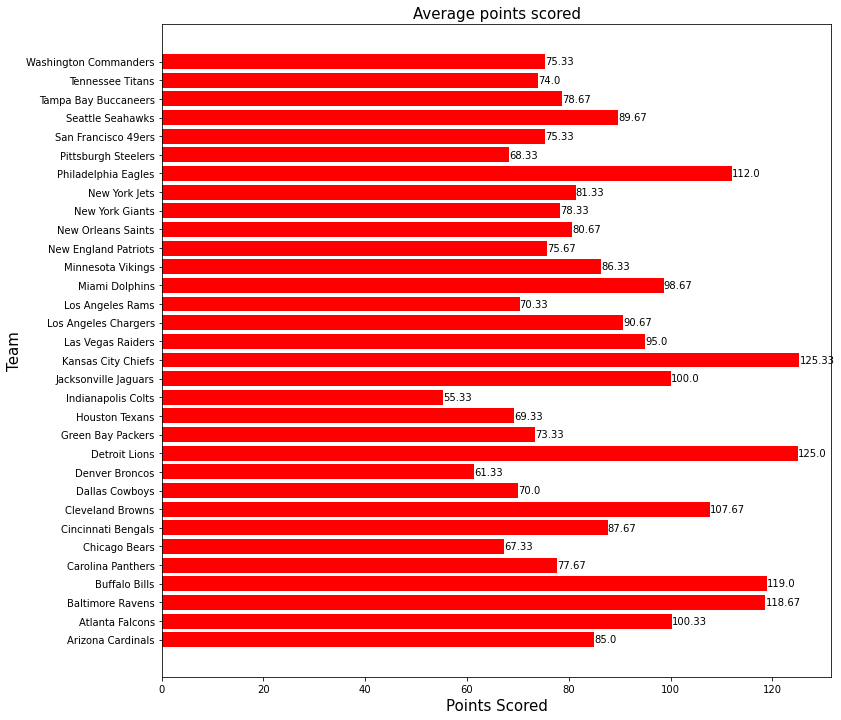

In [272]:
plt.figure(figsize=(12, 12))
Group = stacked_files.groupby('team').points_scored.mean()
barhplot = plt.barh(Group.index, Group,color='r')
plt.title("Average points scored",fontsize=15)
plt.xlabel("Points Scored",fontsize=15)
plt.ylabel("Team",fontsize=15)
plt.bar_label(barhplot, labels = round(Group,2))

plt.show()


3. Plot the average passing yards and average rushing yards for each team as a stacked bar chart.

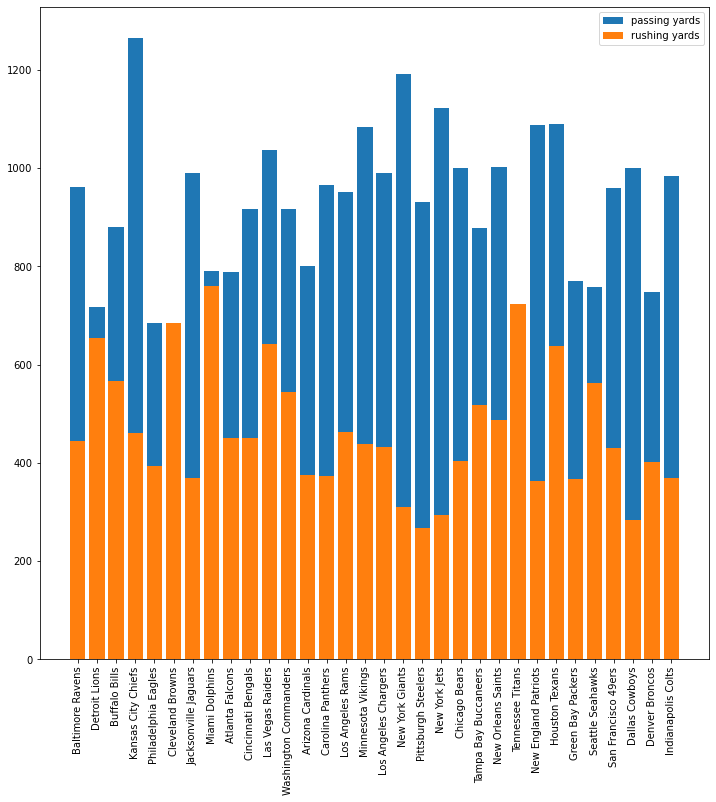

In [294]:
plt.figure(figsize=(12, 12))
x = all_files.team.unique()
y = all_files.groupby('team').passing_yards.mean()
z = all_files.groupby('team').rushing_yards.mean()

plt.bar(x,y)
plt.bar(x,z)
plt.legend(["Baltimore Ravens", "LA Rams"])
plt.legend(["passing yards", "rushing yards"])
plt.xticks(x, rotation='vertical');

plt.show()

4. Plot the average total yards vs average first downs for each team on a scatter plot (with first downs on the x axis and total yards on the y axis).

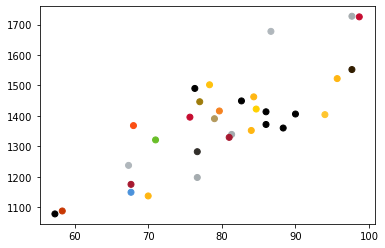

In [291]:
plt.scatter(all_files.groupby('team')['first_downs'].mean(), all_files.groupby('team').total_yards.mean(),color= colors_logos.team_color2)



5. Plot the penalty yards for the Balitmore Ravens and the LA Rams for each week as a line chart (with week on the x-axis and penalty yards on the y-axis).

- For some reason 'Los Angeles Rams' won't work so I used the abbreviated name

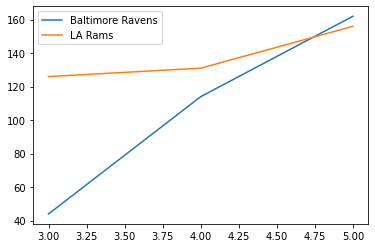

In [ ]:
x = all_files.week.unique()
y = all_files[all_files.team == 'Baltimore Ravens'].penalty_yards
z = all_files[all_files.team_abbr == 'LA'].penalty_yards

plt.plot(x,y)
plt.plot(x,z)
plt.legend(["Baltimore Ravens", "LA Rams"])
plt.show()

6. Plot the average total points vs average yards per play for each team as a bar chart (with total points on the y-axis and yards per play on the x-axis).

- don't know how to put the team names on the bottom without messing up the yards per play

<BarContainer object of 32 artists>

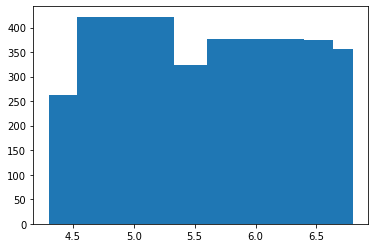

In [ ]:
plt.bar(all_files.groupby('team').yards_per_play.mean(), all_files.groupby('team').points_scored.sum())

7. Plot the number of penalty yards for each team in the NFC West for each week on bar chart.

<BarContainer object of 12 artists>

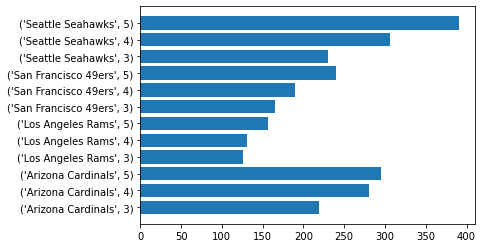

In [ ]:
penalties = all_files[all_files.team_division.str.contains("NFC West")].groupby(['team', 'week']).penalty_yards.mean()
team_names = [str(names) for names in penalties.keys().values]
plt.barh(team_names, penalties.values)

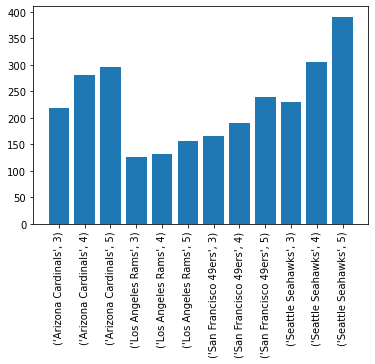

In [298]:
penalties_nfc_west = all_files[all_files.team_division.str.contains("NFC West")].groupby(['team', 'week']).penalty_yards.mean()
team_names = [str(names) for names in penalties_nfc_west.keys().values]
plt.bar(team_names, penalties_nfc_west.values)
plt.xticks(team_names, rotation='vertical');

8. Plot the average number of weekly points per (conference and division) on a horizontal bar chart. (There will be 8 bars.)

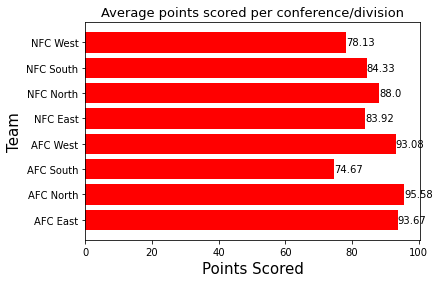

In [ ]:

#plt.figure(figsize=(12, 12))
Group = all_files.groupby('team_division').points_scored.mean()
barhplot = plt.barh(Group.index, Group,color='r')
plt.title("Average points scored per conference/division",fontsize=13)
plt.xlabel("Points Scored",fontsize=15)
plt.ylabel("Team",fontsize=15)
plt.bar_label(barhplot, labels = round(Group,2))

plt.show()